# Problem: we want to implement the following signatures

In [1]:
def foo1[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    ???

defined function foo1

In [3]:
def foo2[P, Q, R]: (P => (Q => R)) => (P => Q) => (P => R) = 
    ???

defined function foo2

In [4]:
type Not[P] = P => Nothing 

def foo3[P, Q, R, S](p1: Either[P, Either[Q, R]], p2: Either[Not[P], S], p3: S => R): Not[Q] => R =
    ???

defined type Not
defined function foo3

In [5]:
def foo4[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    ???

defined function foo4

In [2]:
def foo5[P, Q, R, S]: Either[P, Q] => (P => R) => (P => S) => Either[R, S] = 
    ???

defined function foo5

# Generating code automatically? Alternative 1: Use LLMs, of course

[Check out](https://chatgpt.com/share/67e43426-cdbc-8013-b208-11770727d042) the full transcript of the session with ChatGpt 4o.

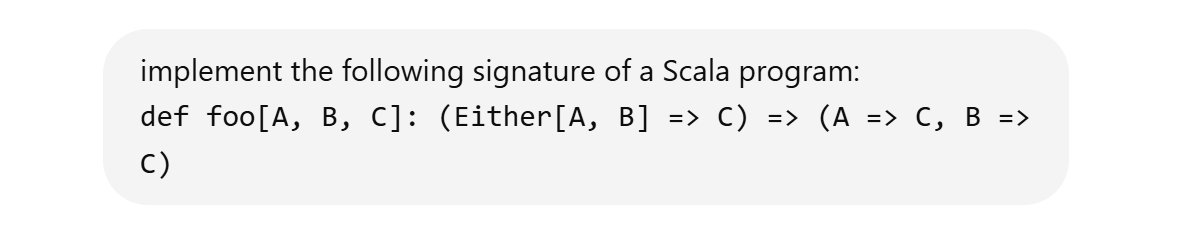

In [6]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = {
  f => (
    a => f(Left(a)),
    b => f(Right(b))
  )
}

defined function foo

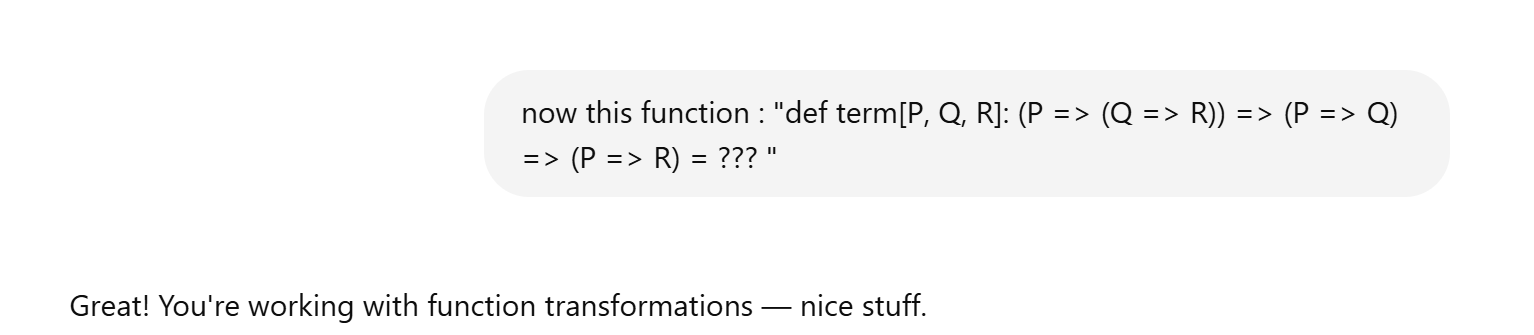

In [7]:
def term[P, Q, R]: (P => (Q => R)) => (P => Q) => (P => R) = {
  f => g => p => f(p)(g(p))
}

defined function term

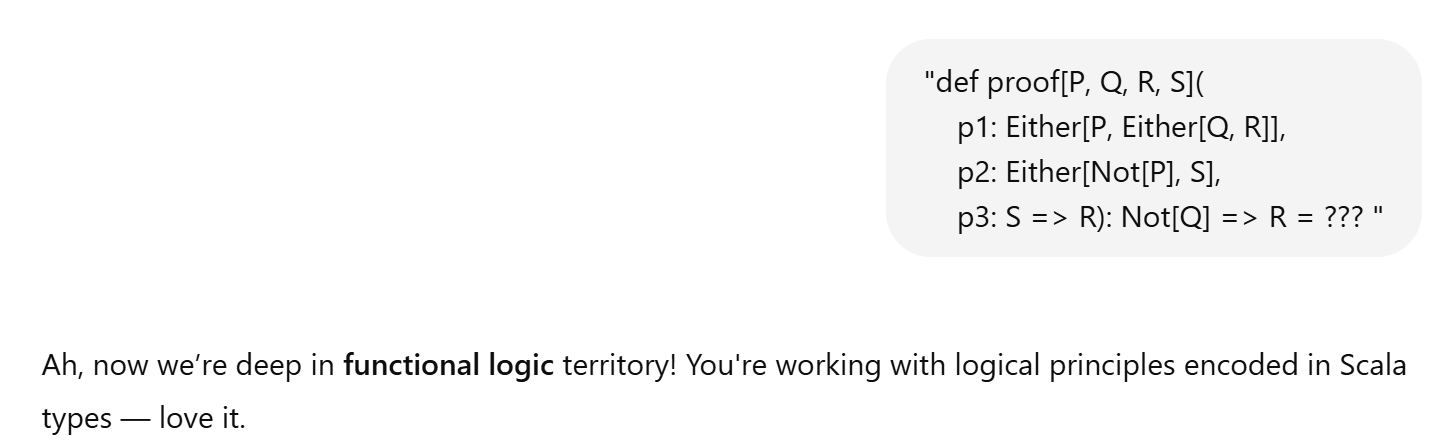

In [8]:
type Not[A] = A => Nothing

def proof[P, Q, R, S](
    p1: Either[P, Either[Q, R]], 
    p2: Either[Not[P], S], 
    p3: S => R
): Not[Q] => R = { notQ =>
  p1 match {
    case Left(p) =>
      p2 match {
        case Left(notP) => notP(p) // returns Nothing => ex falso quodlibet
        case Right(s)   => p3(s)
      }
    case Right(Left(q)) =>
      notQ(q) // contradiction => Nothing => ex falso
    case Right(Right(r)) =>
      r
  }
}

defined type Not
defined function proof

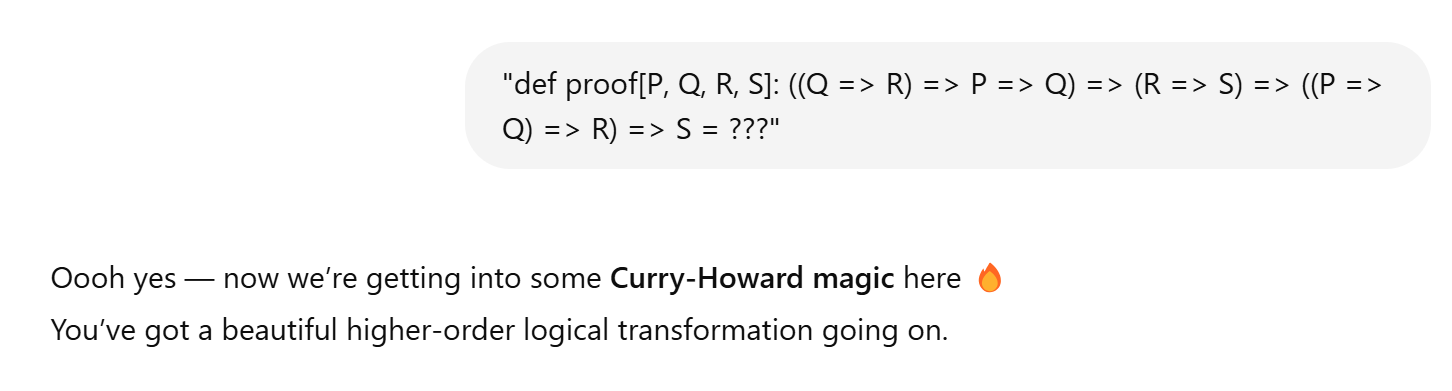

In [1]:
def proof[P, Q, R, S]: 
  ((Q => R) => P => Q) => 
  (R => S) => 
  ((P => Q) => R) => 
  S = { f1 => f2 => f3 =>
  
  // Step 1: construct Q => R
  val qr: Q => R = q => f3(f1(_ => q))
  
  // Step 2: get P => Q using f1
  val pq: P => Q = f1(qr)
  
  // Step 3: apply f3 to get R
  val r: R = f3(pq)
  
  // Step 4: apply f2 to get S
  f2(r)
}


(console)
-- [E040] Syntax Error: <splitter>:5:4 -----------------------------------------
5 |  S = { f1 => f2 => f3 =>
  |    ^
  |    unindent expected, but '=' found

In [1]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = { 
    f1 => f2 => f3 =>

        // Step 1: construct Q => R
        val qr: Q => R = q => f3(f1(_ => q))

        // Step 2: get P => Q using f1
        val pq: P => Q = f1(qr)

        // Step 3: apply f3 to get R
        val r: R = f3(pq)

        // Step 4: apply f2 to get S
        f2(r)
}

-- [E007] Type Mismatch Error: cmd2.sc:5:41 ------------------------------------
5 |        val qr: Q => R = q => f3(f1(_ => q))
  |                                         ^
  |                                         Found:    (q : Q)
  |                                         Required: R
  |
  | longer explanation available when compiling with `-explain`
Compilation Failed

IMAGE: black magic!

# Alternative 2: use logic & macros!

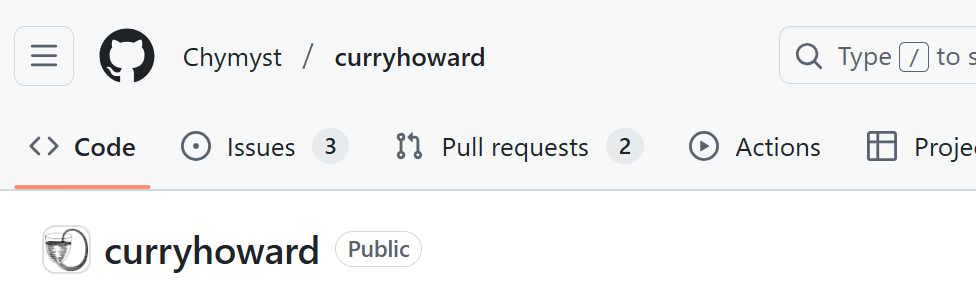

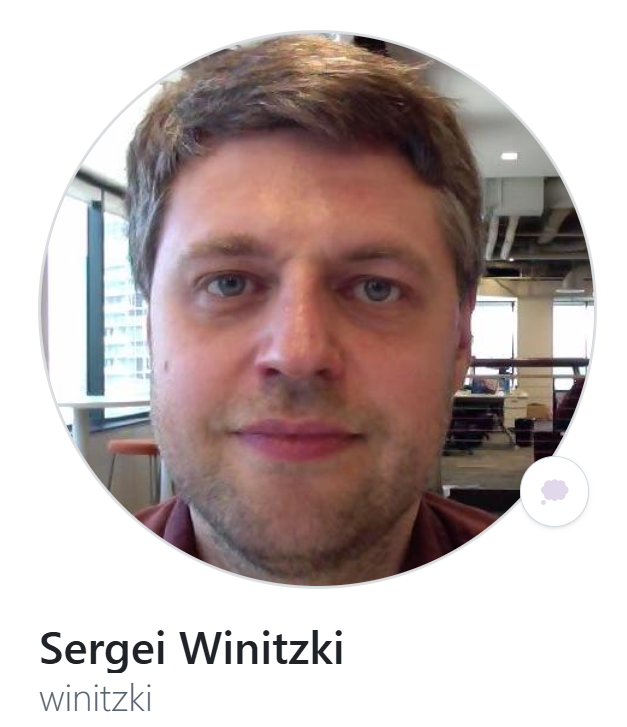

https://github.com/Chymyst

IMAGE: white magic

# Type-driven development with Algebraic data types

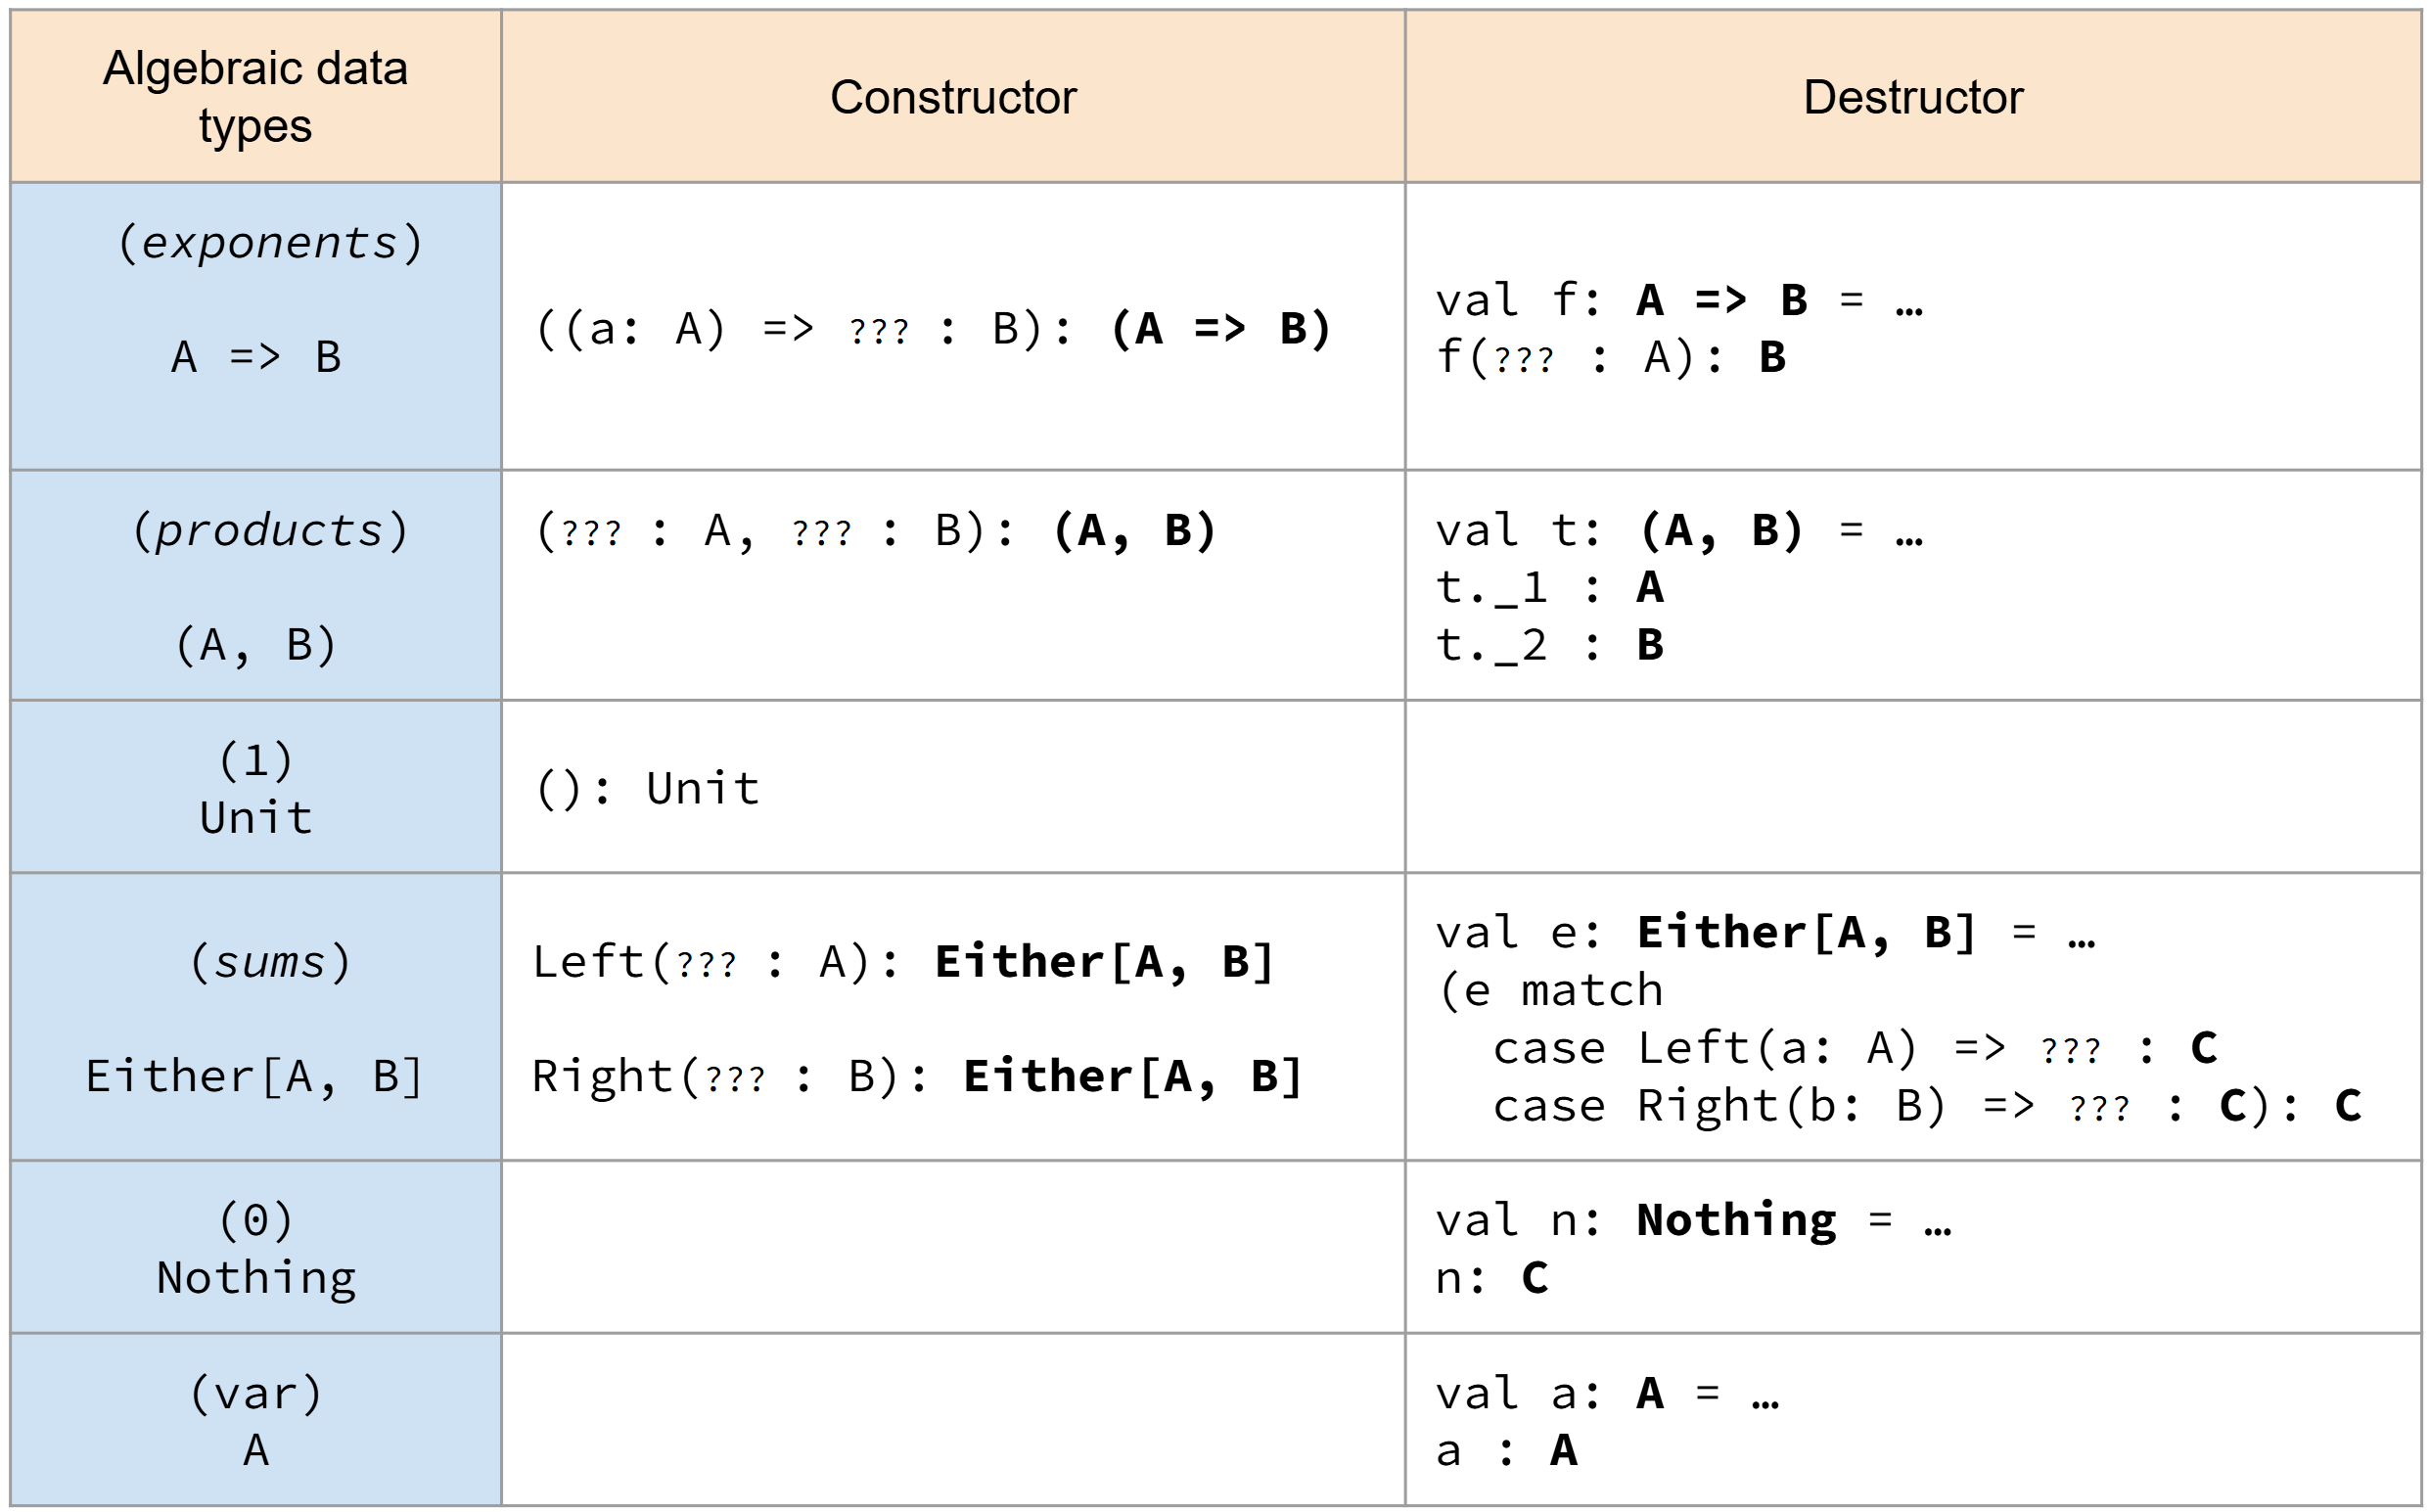

### def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C)

In [9]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    ??? : ((Either[A, B] => C) => (A => C, B => C))

defined function foo

In [10]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    (f: Either[A, B] => C) => 
        ??? : (A => C, B => C)

defined function foo

In [11]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    (f: Either[A, B] => C) => 
        (??? : A => C, ??? : B => C)

defined function foo

In [12]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    (f: Either[A, B] => C) => 
        ((a: A) => ??? : C, 
         (b: B) => ??? : C)

defined function foo

In [13]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    (f: Either[A, B] => C) => 
        ((a: A) => f(??? : Either[A, B]) : C, 
         (b: B) => f(??? : Either[A, B]) : C)

defined function foo

In [14]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    (f: Either[A, B] => C) => 
        ((a: A) => f(Left(??? : A) : Either[A, B]) : C, 
         (b: B) => f(Right(??? : B) : Either[A, B]) : C)

defined function foo

In [15]:
def foo[A, B, C]: (Either[A, B] => C) => (A => C, B => C) = 
    (f: Either[A, B] => C) => 
        ((a: A) => f(Left(a : A) : Either[A, B]) : C, 
         (b: B) => f(Right(b : B) : Either[A, B]) : C)

defined function foo

### def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S

In [16]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    ??? : (((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S)

defined function proof

In [17]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        ??? : ((R => S) => ((P => Q) => R) => S)

defined function proof

In [18]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            ??? : (((P => Q) => R) => S)

defined function proof

In [19]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                ??? : S

defined function proof

In [20]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(??? : R) : S

defined function proof

In [21]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(h(??? : P => Q) : R) : S

defined function proof

In [22]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(h(f(??? : Q => R): P => Q) : R) : S

defined function proof

In [23]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(h(f((q: Q) => ??? : R): P => Q) : R) : S

defined function proof

In [24]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(h(f((q: Q) => h(??? : P => Q) : R): P => Q) : R) : S

defined function proof

In [25]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(h(f((q: Q) => h((_ : P) => ??? : Q) : R): P => Q) : R) : S

defined function proof

In [26]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    (f: (Q => R) => P => Q) => 
        (g: R => S) => 
            (h: (P => Q) => R) => 
                g(h(f((q: Q) => h((_ : P) => q : Q) : R): P => Q) : R) : S

defined function proof

In [3]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    f => g => h => g(h(f(q => h(_ => q))))

defined function proof

# Type-driven development: it's literally about logic!

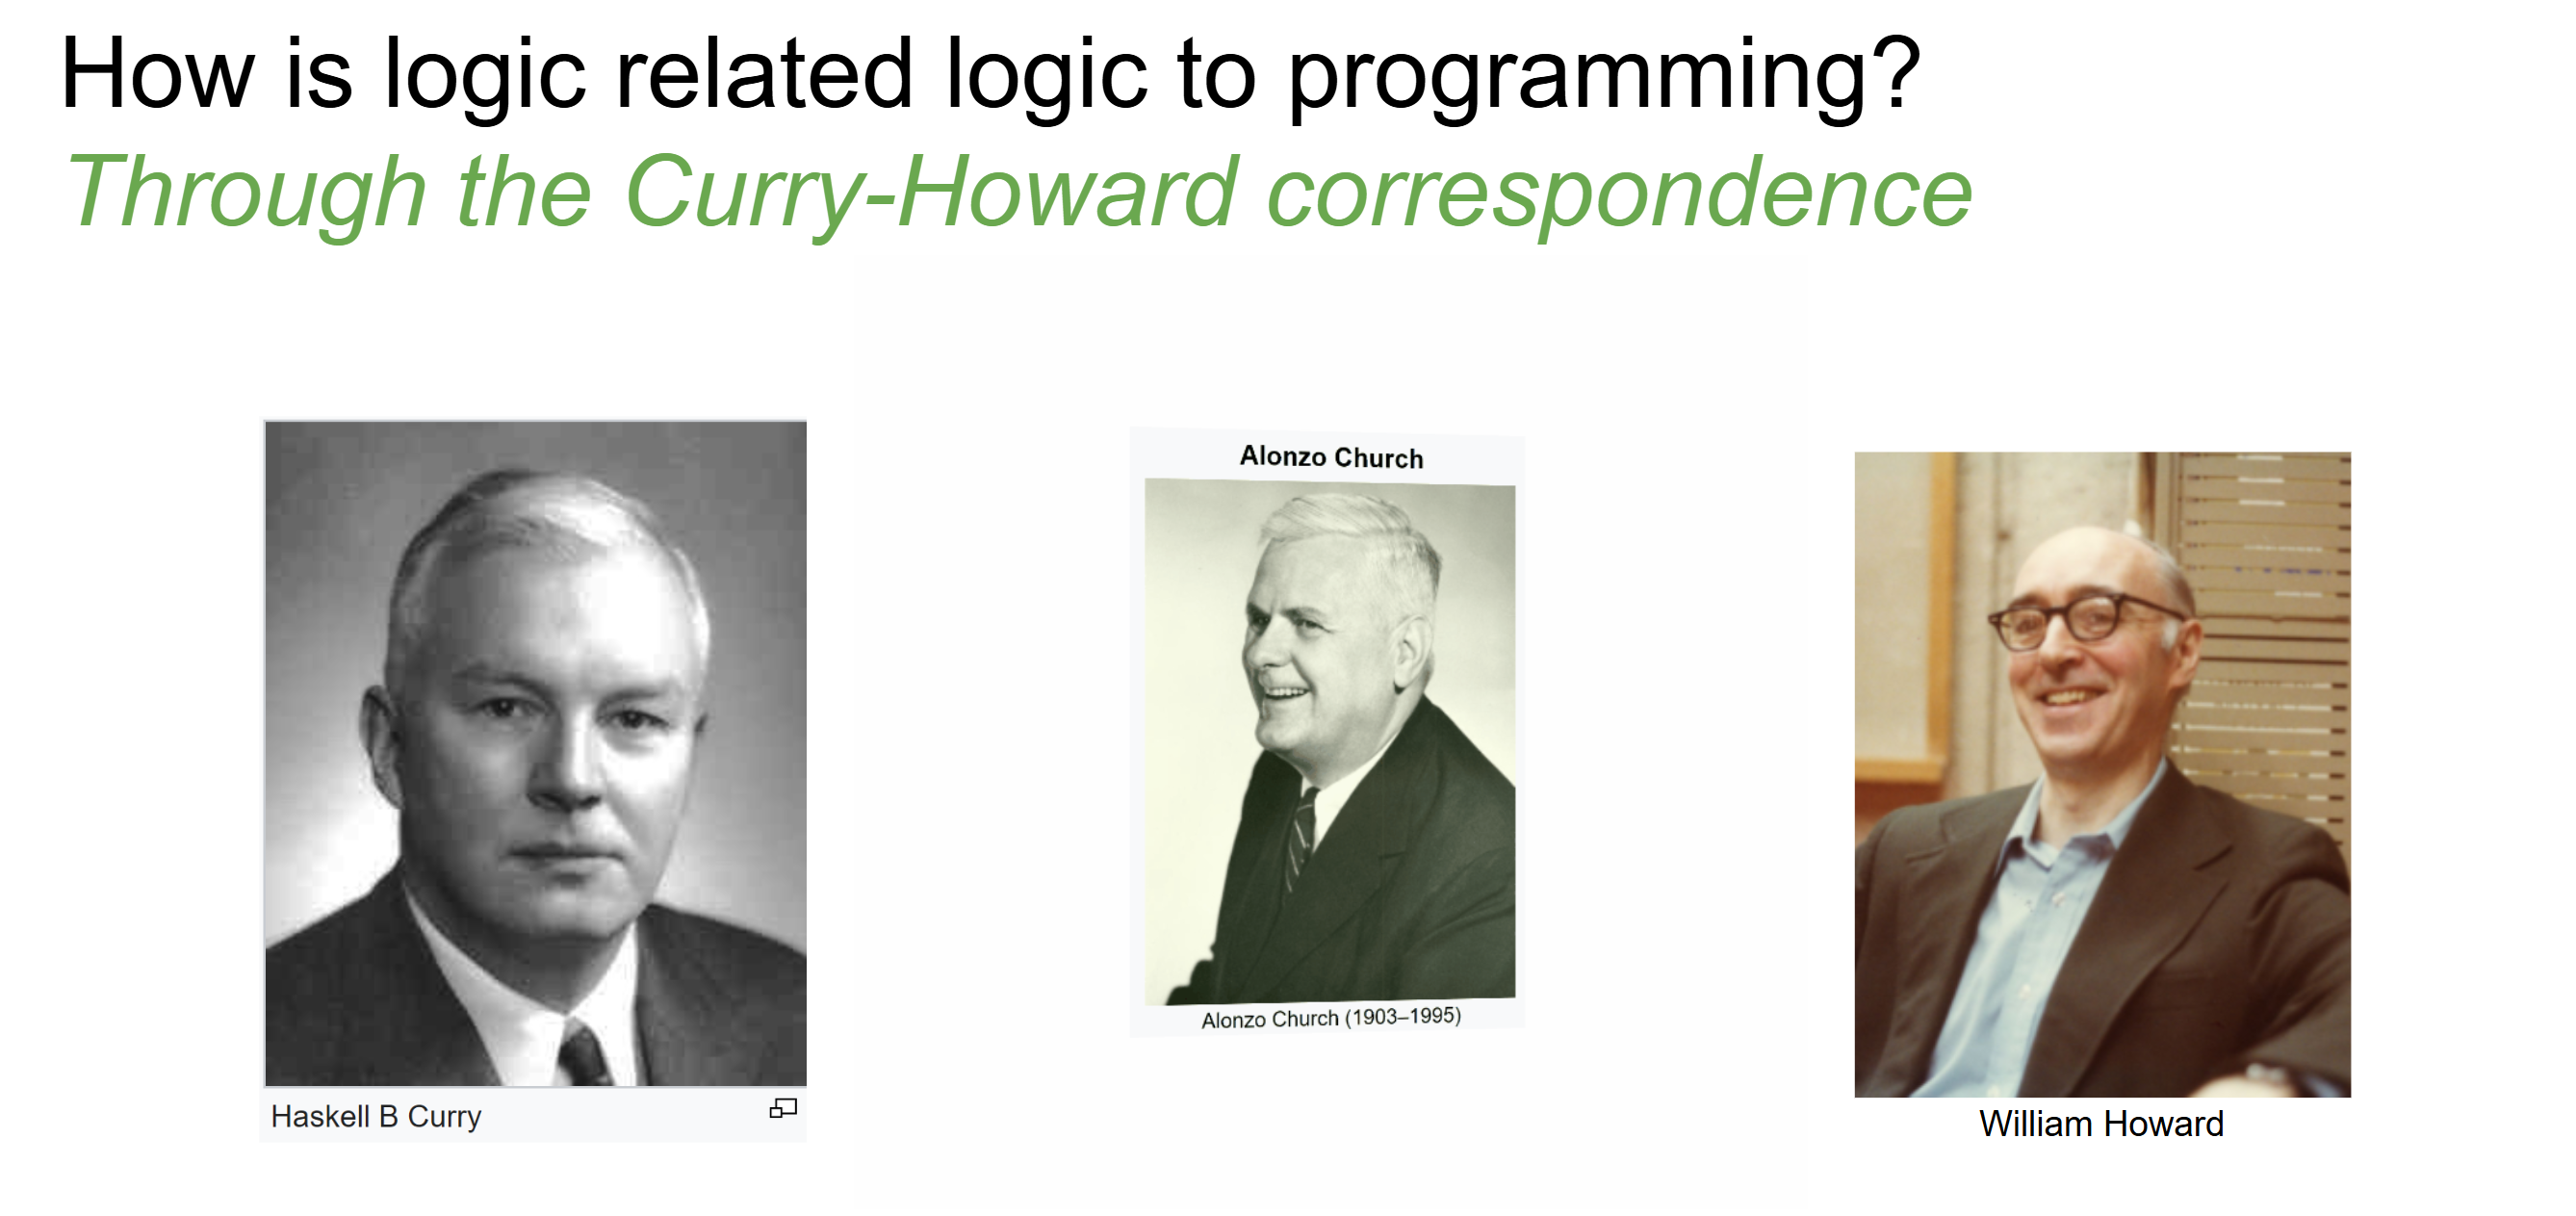

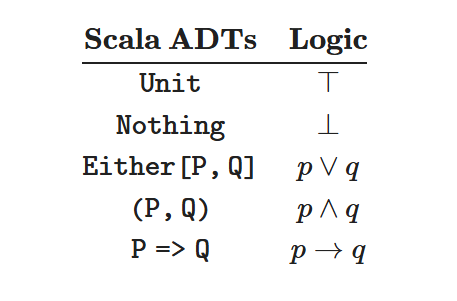

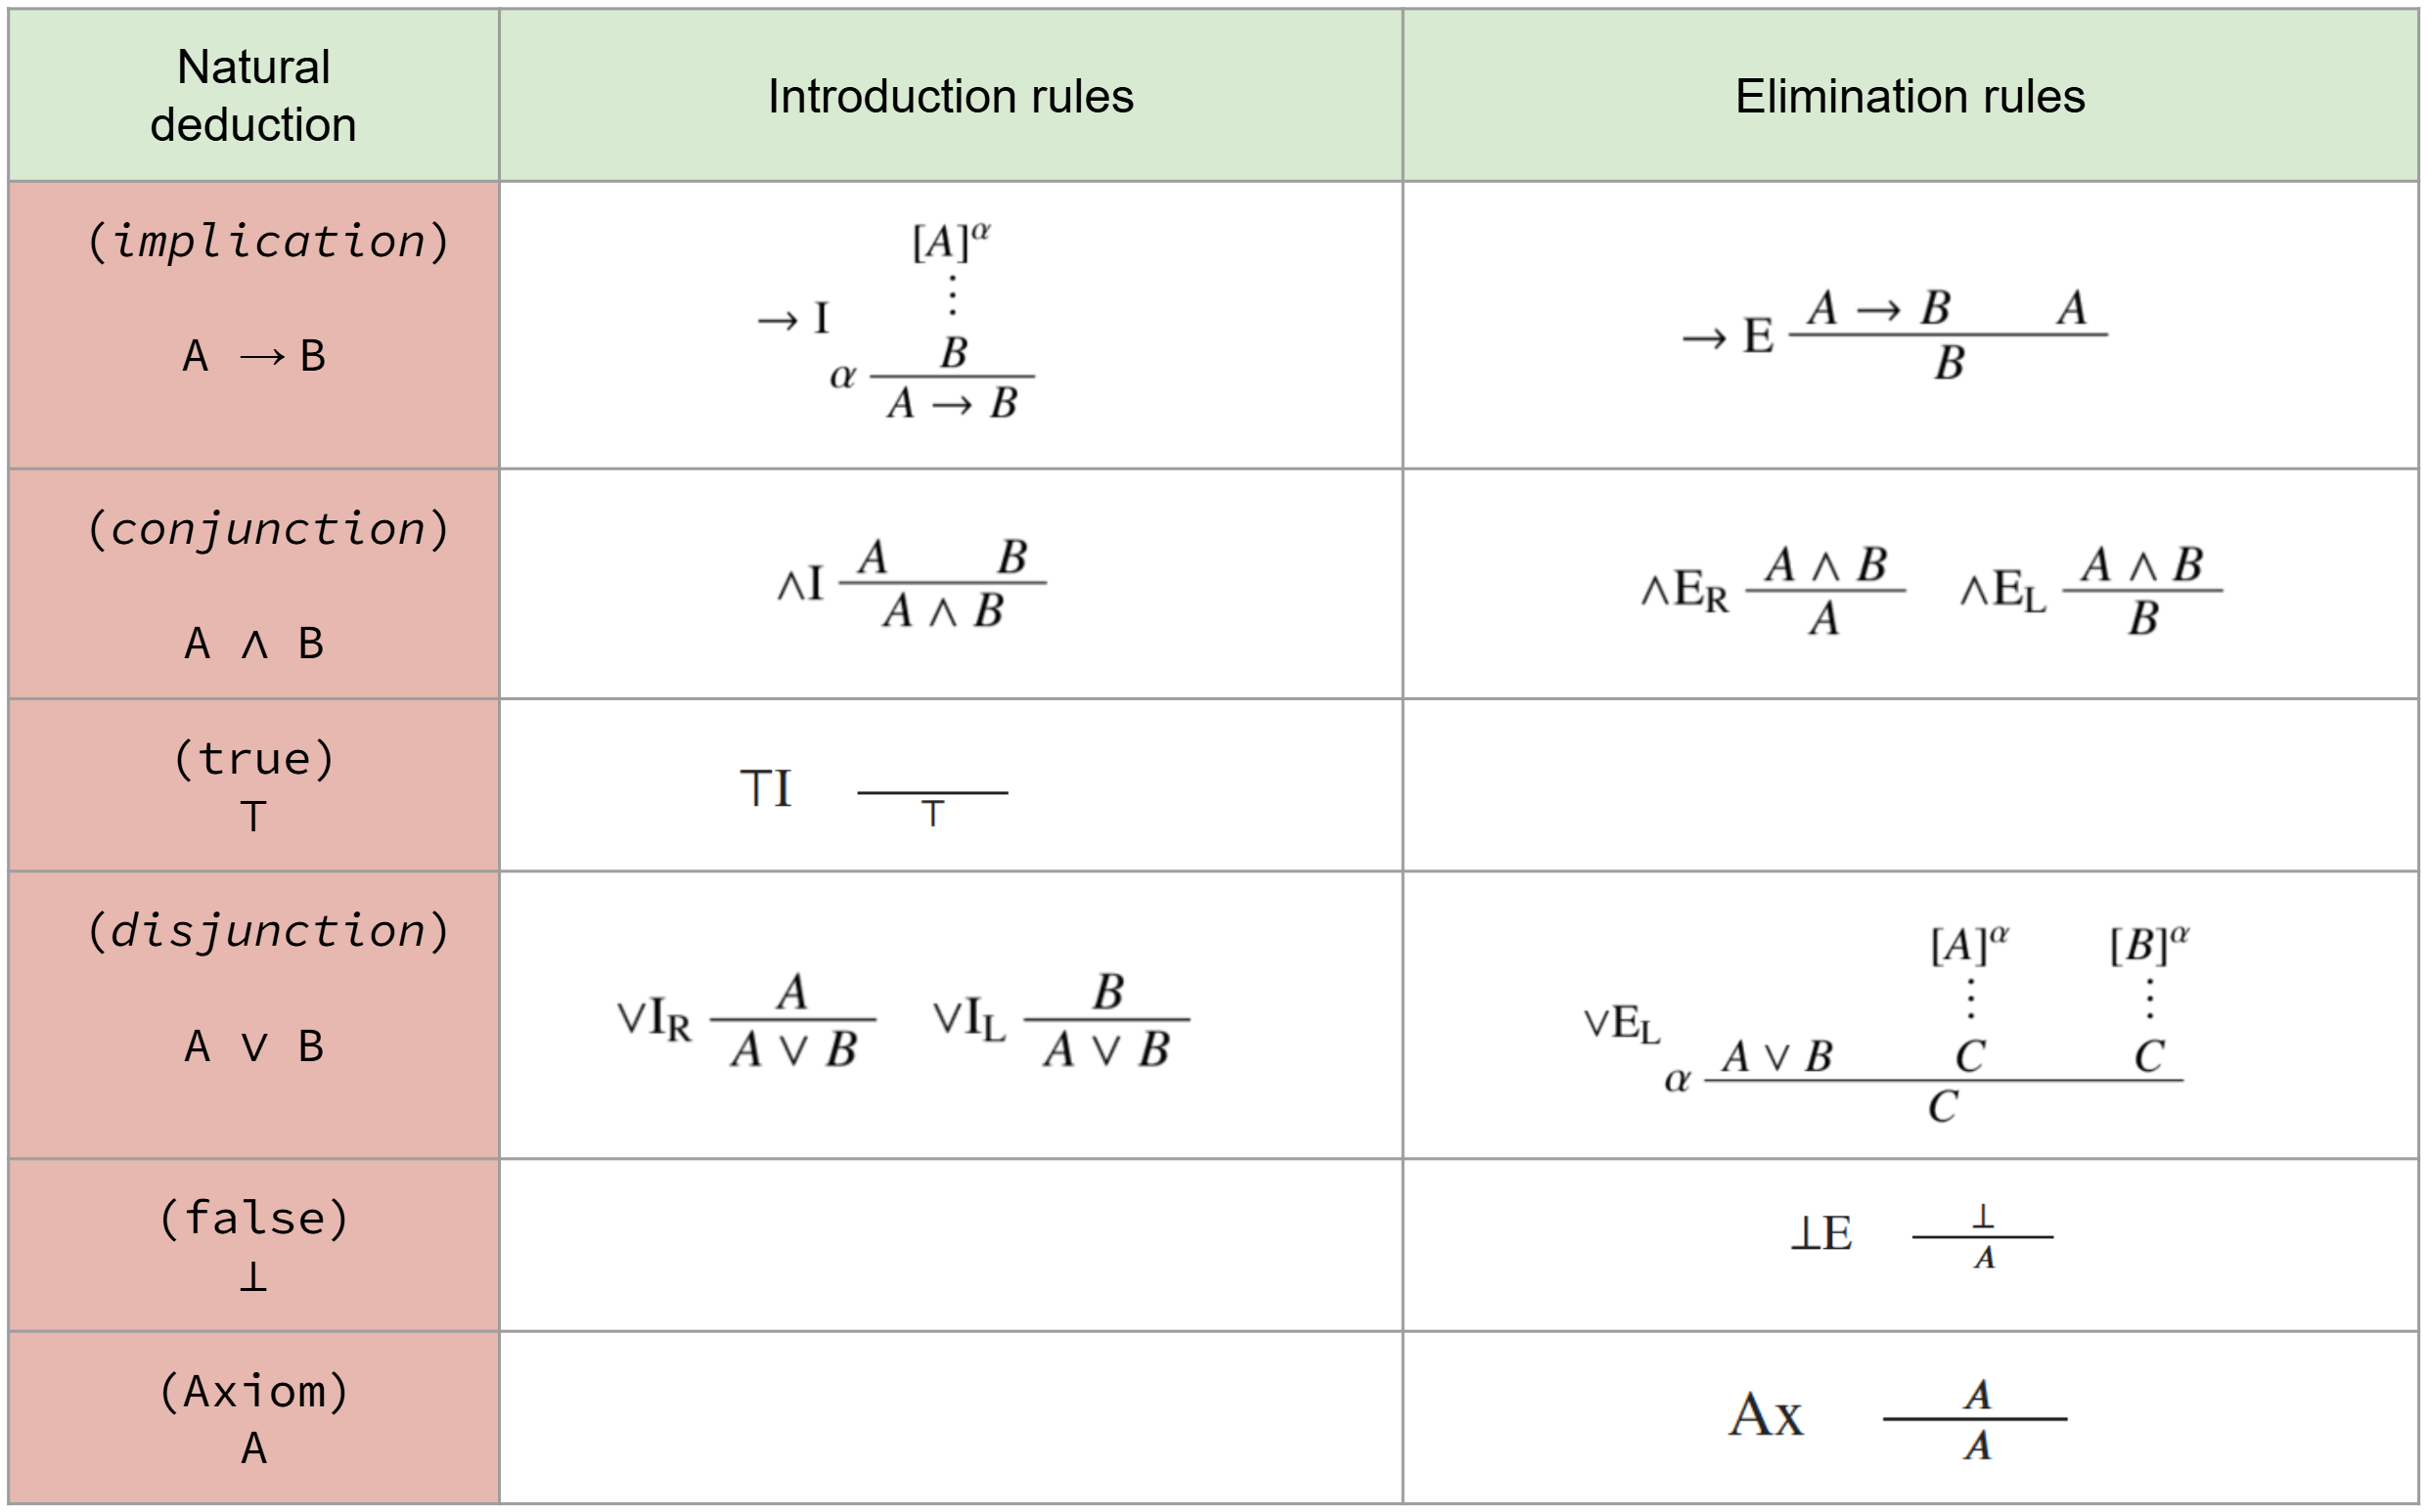

In [44]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    ???

defined function proof

$\vdash ((Q \rightarrow R) \rightarrow P \rightarrow Q) \rightarrow (R \rightarrow S) \rightarrow ((P \rightarrow Q) \rightarrow R) \rightarrow S$

$$
\begin{array}{lr}
     1.\ (Q \rightarrow  R) \rightarrow  P \rightarrow  Q) &  assumption \\
         \qquad 2.\ R \rightarrow  S &  assumption \\
             \qquad \qquad 3.\ (P \rightarrow  Q) -> R &  assumption \\
                 \qquad \qquad \qquad 4.\ Q &  assumption \\
                     \qquad \qquad \qquad \qquad 5.\  P &  assumption \\
                         \qquad \qquad \qquad \qquad \qquad 6.\  Q &  Ax 4 \\
                     \qquad \qquad \qquad \qquad 7.\  P \rightarrow  Q &  \rightarrow I 5,6 \\
                     \qquad \qquad \qquad \qquad 8.\  R &  \rightarrow E 3,7 \\
                 \qquad \qquad \qquad 9.\  Q \rightarrow  R &  \rightarrow I 4,8 \\
                 \qquad \qquad \qquad 10.\  P \rightarrow  Q &  \rightarrow E 1,9 \\
                 \qquad \qquad \qquad 11.\  R &  \rightarrow E 3,10 \\
                 \qquad \qquad \qquad 12.\  S &  \rightarrow E 2,11  \\
             \qquad \qquad13.\  ((P \rightarrow  Q) \rightarrow  R) \rightarrow  S &  \rightarrow I 3,12 \\
         \qquad 14.\  (R \rightarrow  S) \rightarrow  ((P \rightarrow  Q) \rightarrow  R) \rightarrow  S & \rightarrow I 2,13  \\
     15.\  ((Q \rightarrow  R) \rightarrow  P \rightarrow  Q) \rightarrow  (R \rightarrow  S) \rightarrow  ((P \rightarrow  Q) \rightarrow  R) \rightarrow  S\rightarrow I & \rightarrow I 1,14\\
\end{array}
$$

In [74]:
def proof[P, Q, R, S]: ((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S = 
    // 1. (Q -> R) -> P -> Q) . assumption
    (( `1`: (Q => R) => P => Q) =>                                  
        // 2. R -> S . assumption
         ((`2`: R => S) =>                                           
            // 3. (P -> Q) -> R . assumption
            ((`3`: (P => Q) => R) =>                                
                // 4. Q . assumption
                val `9` = ((`4`: Q) =>                                  
                    // 5. P . assumption
                    val `7` = ((`5`: P) =>                              
                        // 6. Q . Ax 4
                        `4`: Q                                       
                    // 7. P -> Q . ->I 5,6
                    ): (P => Q)                                     
                    // 8. R . ->E 3,7
                    `3`(`7`) : R                                      
                // 9. Q -> R . ->I 4,8
                ): (Q => R)                                         
                // 10. P -> Q . ->E 1,9
                val `10` =  `1`(`9`): (P => Q)                           
                // 11. R . ->E 3,10
                val `11` = `3`(`10`): R                                   
                // 12. S . ->E 2,11 
                 `2`(`11`): S                                           
            // 13. ((P -> Q) -> R) -> S . ->I
            ): (((P => Q) => R) => S)                              
        // 14. (R -> S) -> ((P -> Q) -> R) -> S .->I
        ): ((R => S) => ((P => Q) => R) => S)                      
    // 15. ((Q -> R) -> P -> Q) -> (R -> S) -> ((P -> Q) -> R) -> S->I .->I
    ): (((Q => R) => P => Q) => (R => S) => ((P => Q) => R) => S)                  

defined function proof